# Spain Wage Structure Survey

The data presented here has been retrieved from the periodical INE survey about Spain's population wage structure:
https://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736177025&menu=ultiDatos&idp=1254735976596

Information about each variable can be found in the dr_EES_2014.xlsx file.


In [1]:
salary <- read.csv("Data/salario.csv")
head(salary)
dim(salary)

,ORDENCCC,ORDENTRA,NUTS1,CNACE,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,⋯,DSIESPA2,SIESPA3,DSIESPA3,SIESPA4,DSIESPA4,SALBRUTO,GEXTRA,VESP,ANOS2,FACTOTAL
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,15000007,1,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,116002.04,38627.76,393.52,3,1.00
2,15000007,2,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,50156.66,11968.66,196.76,3,15.68
3,15000007,3,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,37970.71,6649.79,98.38,4,15.68
4,15000007,4,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,62000.00,24285.70,0.00,4,15.68
5,15000007,5,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,60425.00,15833.24,0.00,3,15.68
6,15000007,6,1,C1,3,Privado,2,3,Hombre,1,⋯,13,6,0,6,0,38200.00,8461.13,0.00,2,15.68


[1] 209436     54

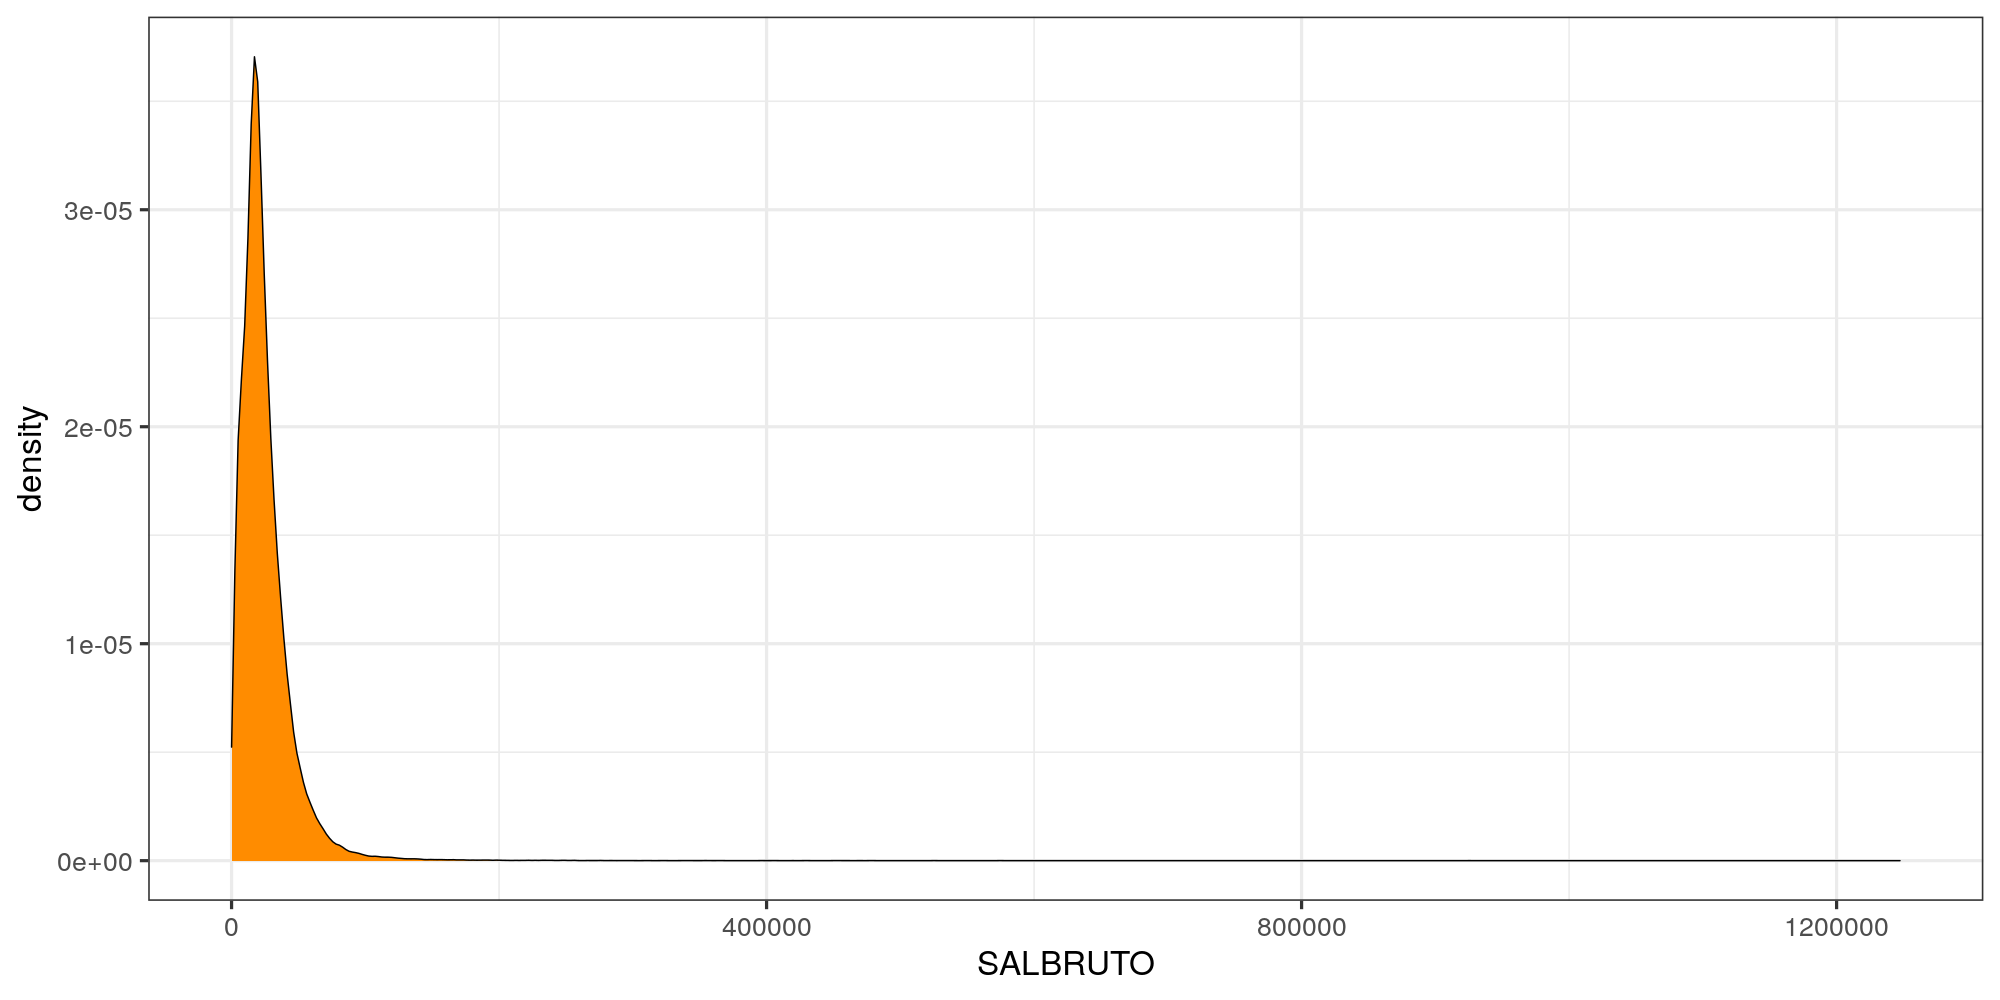

In [2]:
library(ggplot2)

# default plots size
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)

# default theme and font size
theme_set(theme_bw(base_size = 24))



ggplot(salary, aes(x=SALBRUTO)) + geom_density(fill="darkorange", color="black")

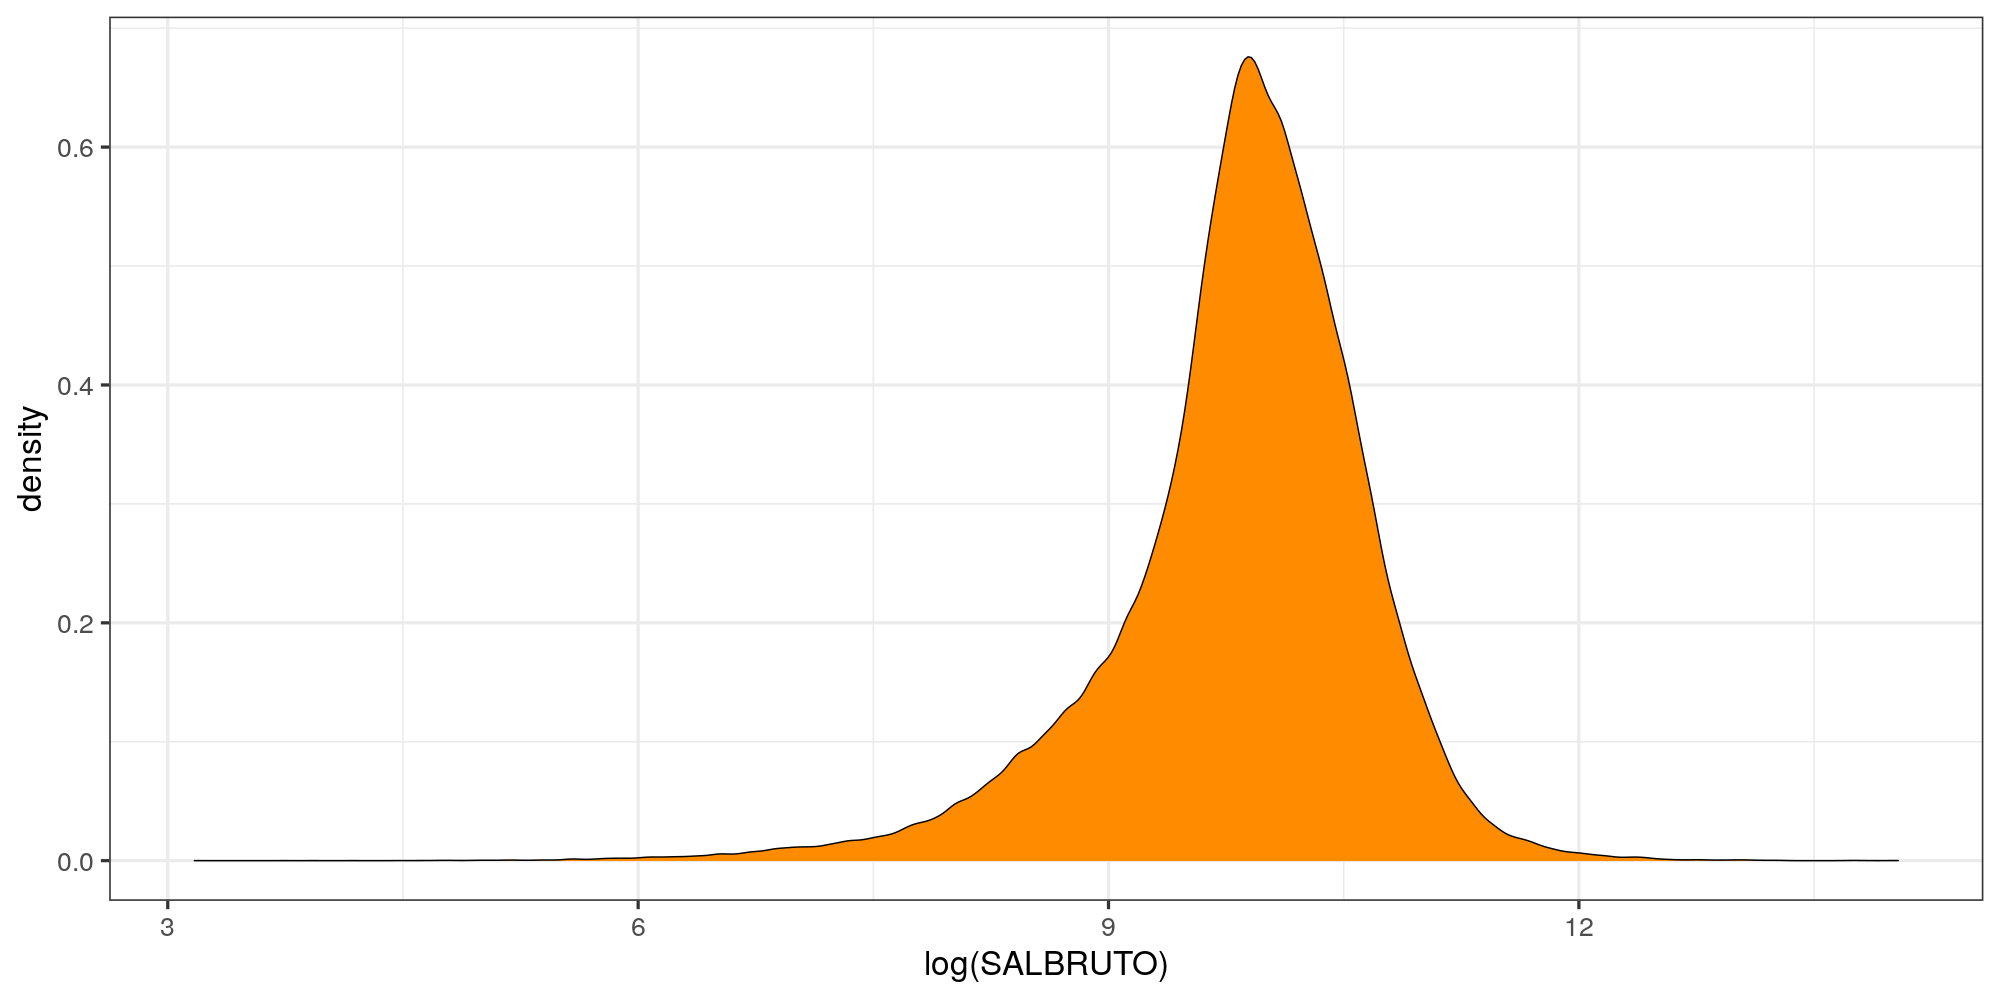

In [3]:
ggplot(salary, aes(x=log(SALBRUTO))) + geom_density(fill="darkorange", color="black")

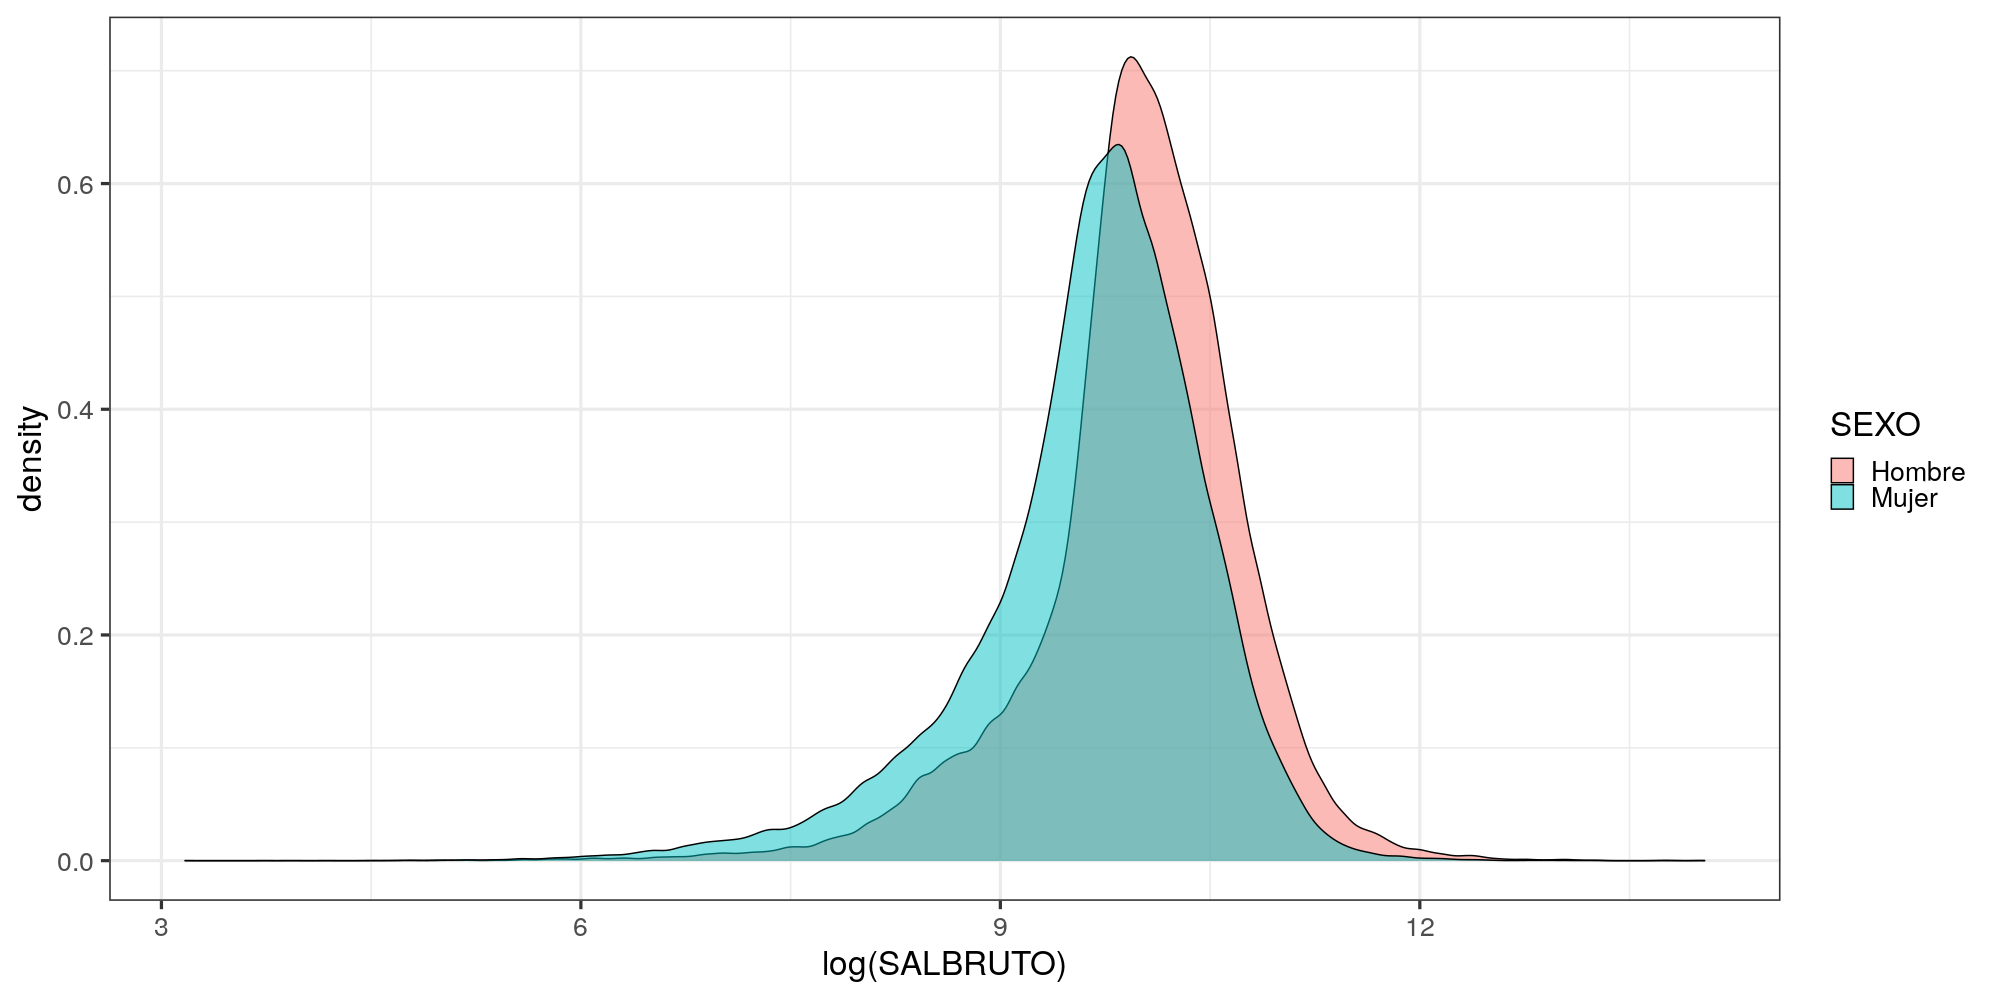

In [4]:
ggplot(salary, aes(x=log(SALBRUTO))) + geom_density(aes(fill=SEXO),  color="black", alpha=0.5)

In [5]:
# How different are wages, on average? Remember aggregate?
aggregate(salary$SALBRUTO, by=list(salary$SEXO), mean)

Group.1,x
<chr>,<dbl>
Hombre,27955.46
Mujer,20530.37


In [6]:
# A0	DIRECTORES Y GERENTES
# B0	TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES DE LA SALUD Y LA ENSEÑANZA
# C0	OTROS TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES
# D0	TÉCNICOS; PROFESIONALES DE APOYO
# E0	EMPLEADOS DE OFICINA QUE NO ATIENDEN AL PÚBLICO
# F0	EMPLEADOS DE OFICINA QUE ATIENDEN AL PÚBLICO
# G0	TRABAJADORES DE LOS SERVICIOS DE RESTAURACION Y COMERCIO
# H0	TRABAJADORES DE LOS SERVICIOS DE SALUD Y EL CUIDADO DE PERSONAS
# I0	TRABAJADORES DE LOS SERVICOS DE PROTECCION Y SEGURIDAD
# J0	TRABAJADORES CUALIFICADOS EN EL SECTOR AGRÍCOLA, GANADERO, FORESTAL Y PESQUERO
# K0	TRABAJADORES CUALIFICADOS DE LA CONSTRUCCION, EXCEPTO LOS OPERADORES DE MÁQUINAS
# L0	TRABAJADORES CUALIFICADOS DE LAS INDUSTRIAS MANUFACTURERAS, EXCEPTO OPERADORES DE INSTALACIONES Y MÁQUINAS
# M0	OPERADORES DE INSTALACIONES Y MAQUINARIA FIJAS, Y MONTADORES
# N0	CONDUCTORES Y OPERADORES DE MAQUINARIA MOVIL
# O0	TRABAJADORES NO CUALIFICADOS EN SERVICIOS
# P0	PEONES DE LA AGRICULTURA, PESCA, CONSTRUCCIÓN, INDUSTRIAS MANUFACTURERAS Y TRANSPORTES
# Q0	OCUPACIONES MILITARES

# How different are wages by position?
aggregate(salary$SALBRUTO, by=list(salary$CNO1), mean)

Group.1,x
<chr>,<dbl>
A0,65335.14
B0,28935.07
C0,37657.04
D0,29646.58
E0,21233.42
F0,17748.21
G0,14422.91
H0,14482.41
I0,21239.06


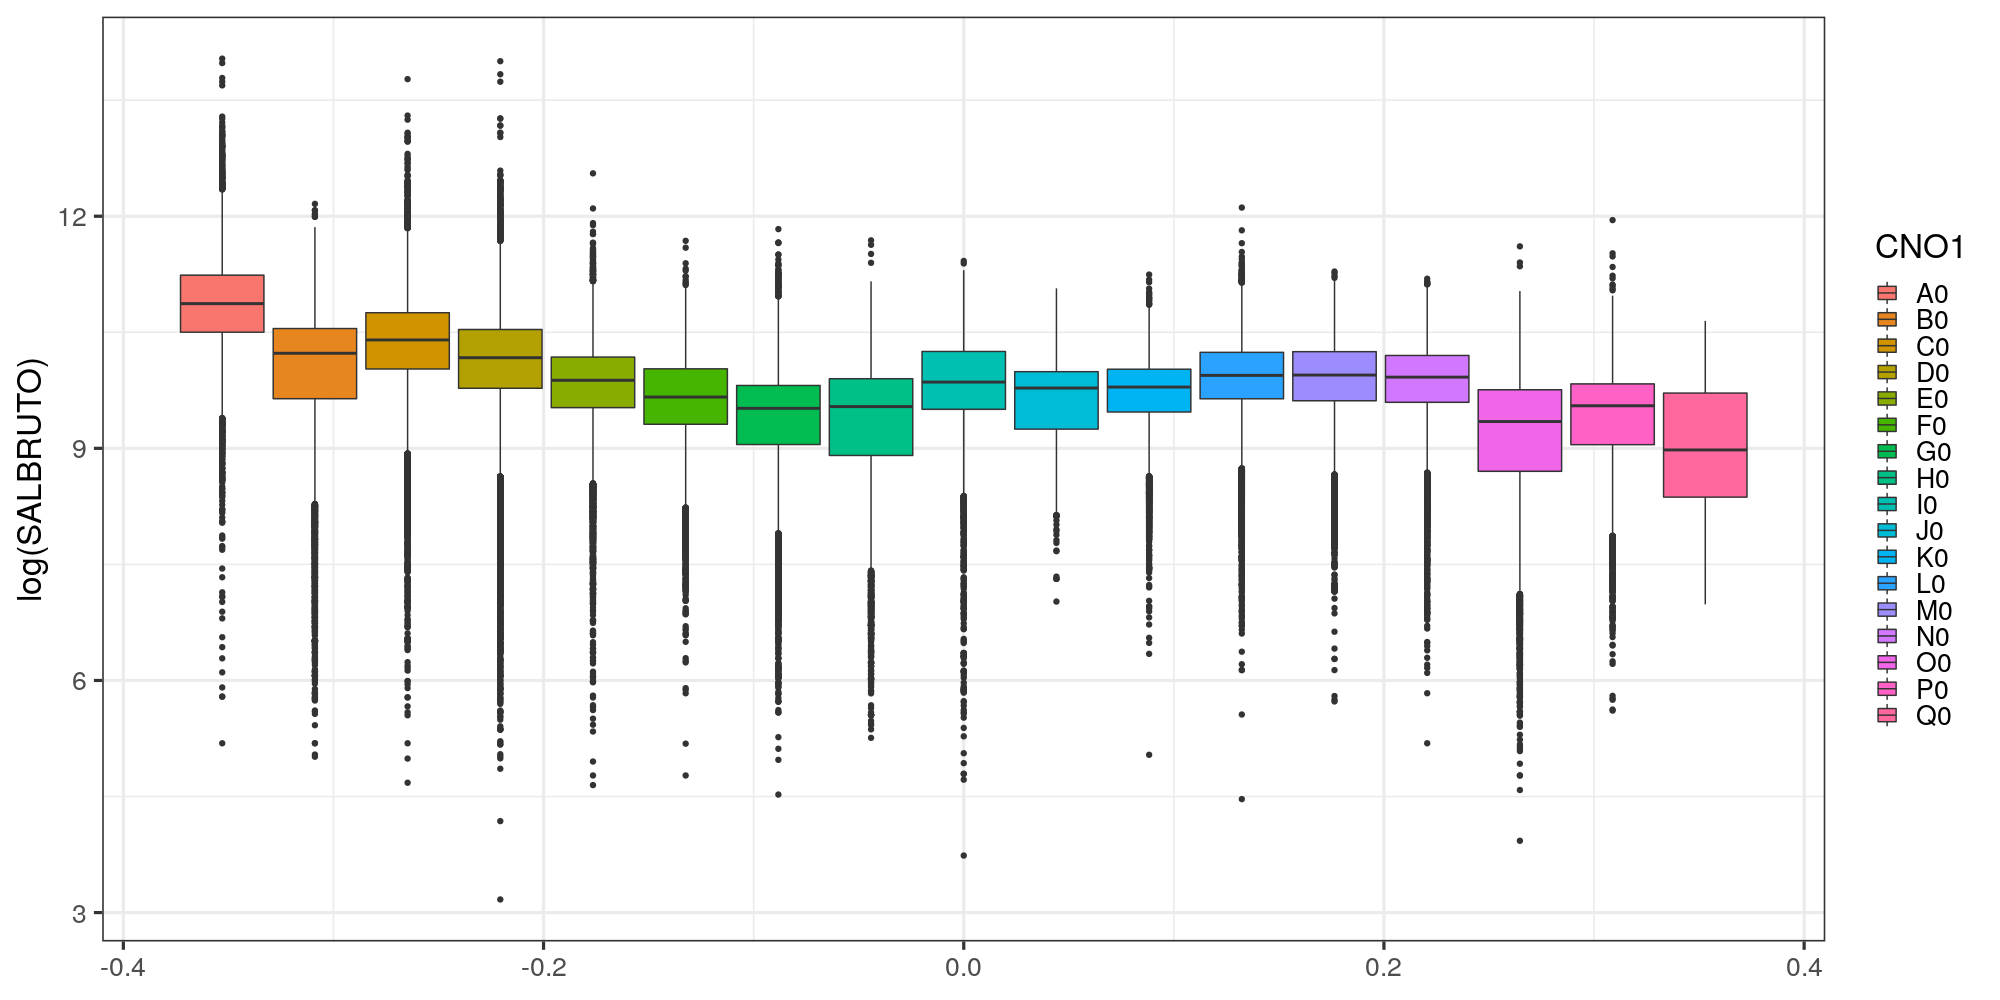

In [7]:
# Boxplots by positions
ggplot(salary, aes(y=log(SALBRUTO))) + geom_boxplot(aes(fill=CNO1))

In [8]:
# Let's compare wages between sexes depending on position
means <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), mean)
sds <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), sd)

head(means)
head(sds)

sex_positions <- data.frame(SEXO=means$`Group.1`, Position=means$`Group.2`,   mean=means$x, sd=sds$x)
sex_positions

,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,Hombre,A0,71980.64
2,Mujer,A0,51693.29
3,Hombre,B0,32607.31
4,Mujer,B0,27261.58
5,Hombre,C0,42061.81
6,Mujer,C0,31928.78


,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,Hombre,A0,63252.38
2,Mujer,A0,39012.92
3,Hombre,B0,22629.96
4,Mujer,B0,16217.06
5,Hombre,C0,30778.75
6,Mujer,C0,18954.57


SEXO,Position,mean,sd
<chr>,<chr>,<dbl>,<dbl>
Hombre,A0,71980.644,63252.383
Mujer,A0,51693.289,39012.922
Hombre,B0,32607.314,22629.963
Mujer,B0,27261.582,16217.059
Hombre,C0,42061.807,30778.752
Mujer,C0,31928.778,18954.569
Hombre,D0,33051.606,25503.002
Mujer,D0,24634.724,16717.705
Hombre,E0,24520.196,13926.233


## Facets

Facets allow you to create multiple plot based on factors.

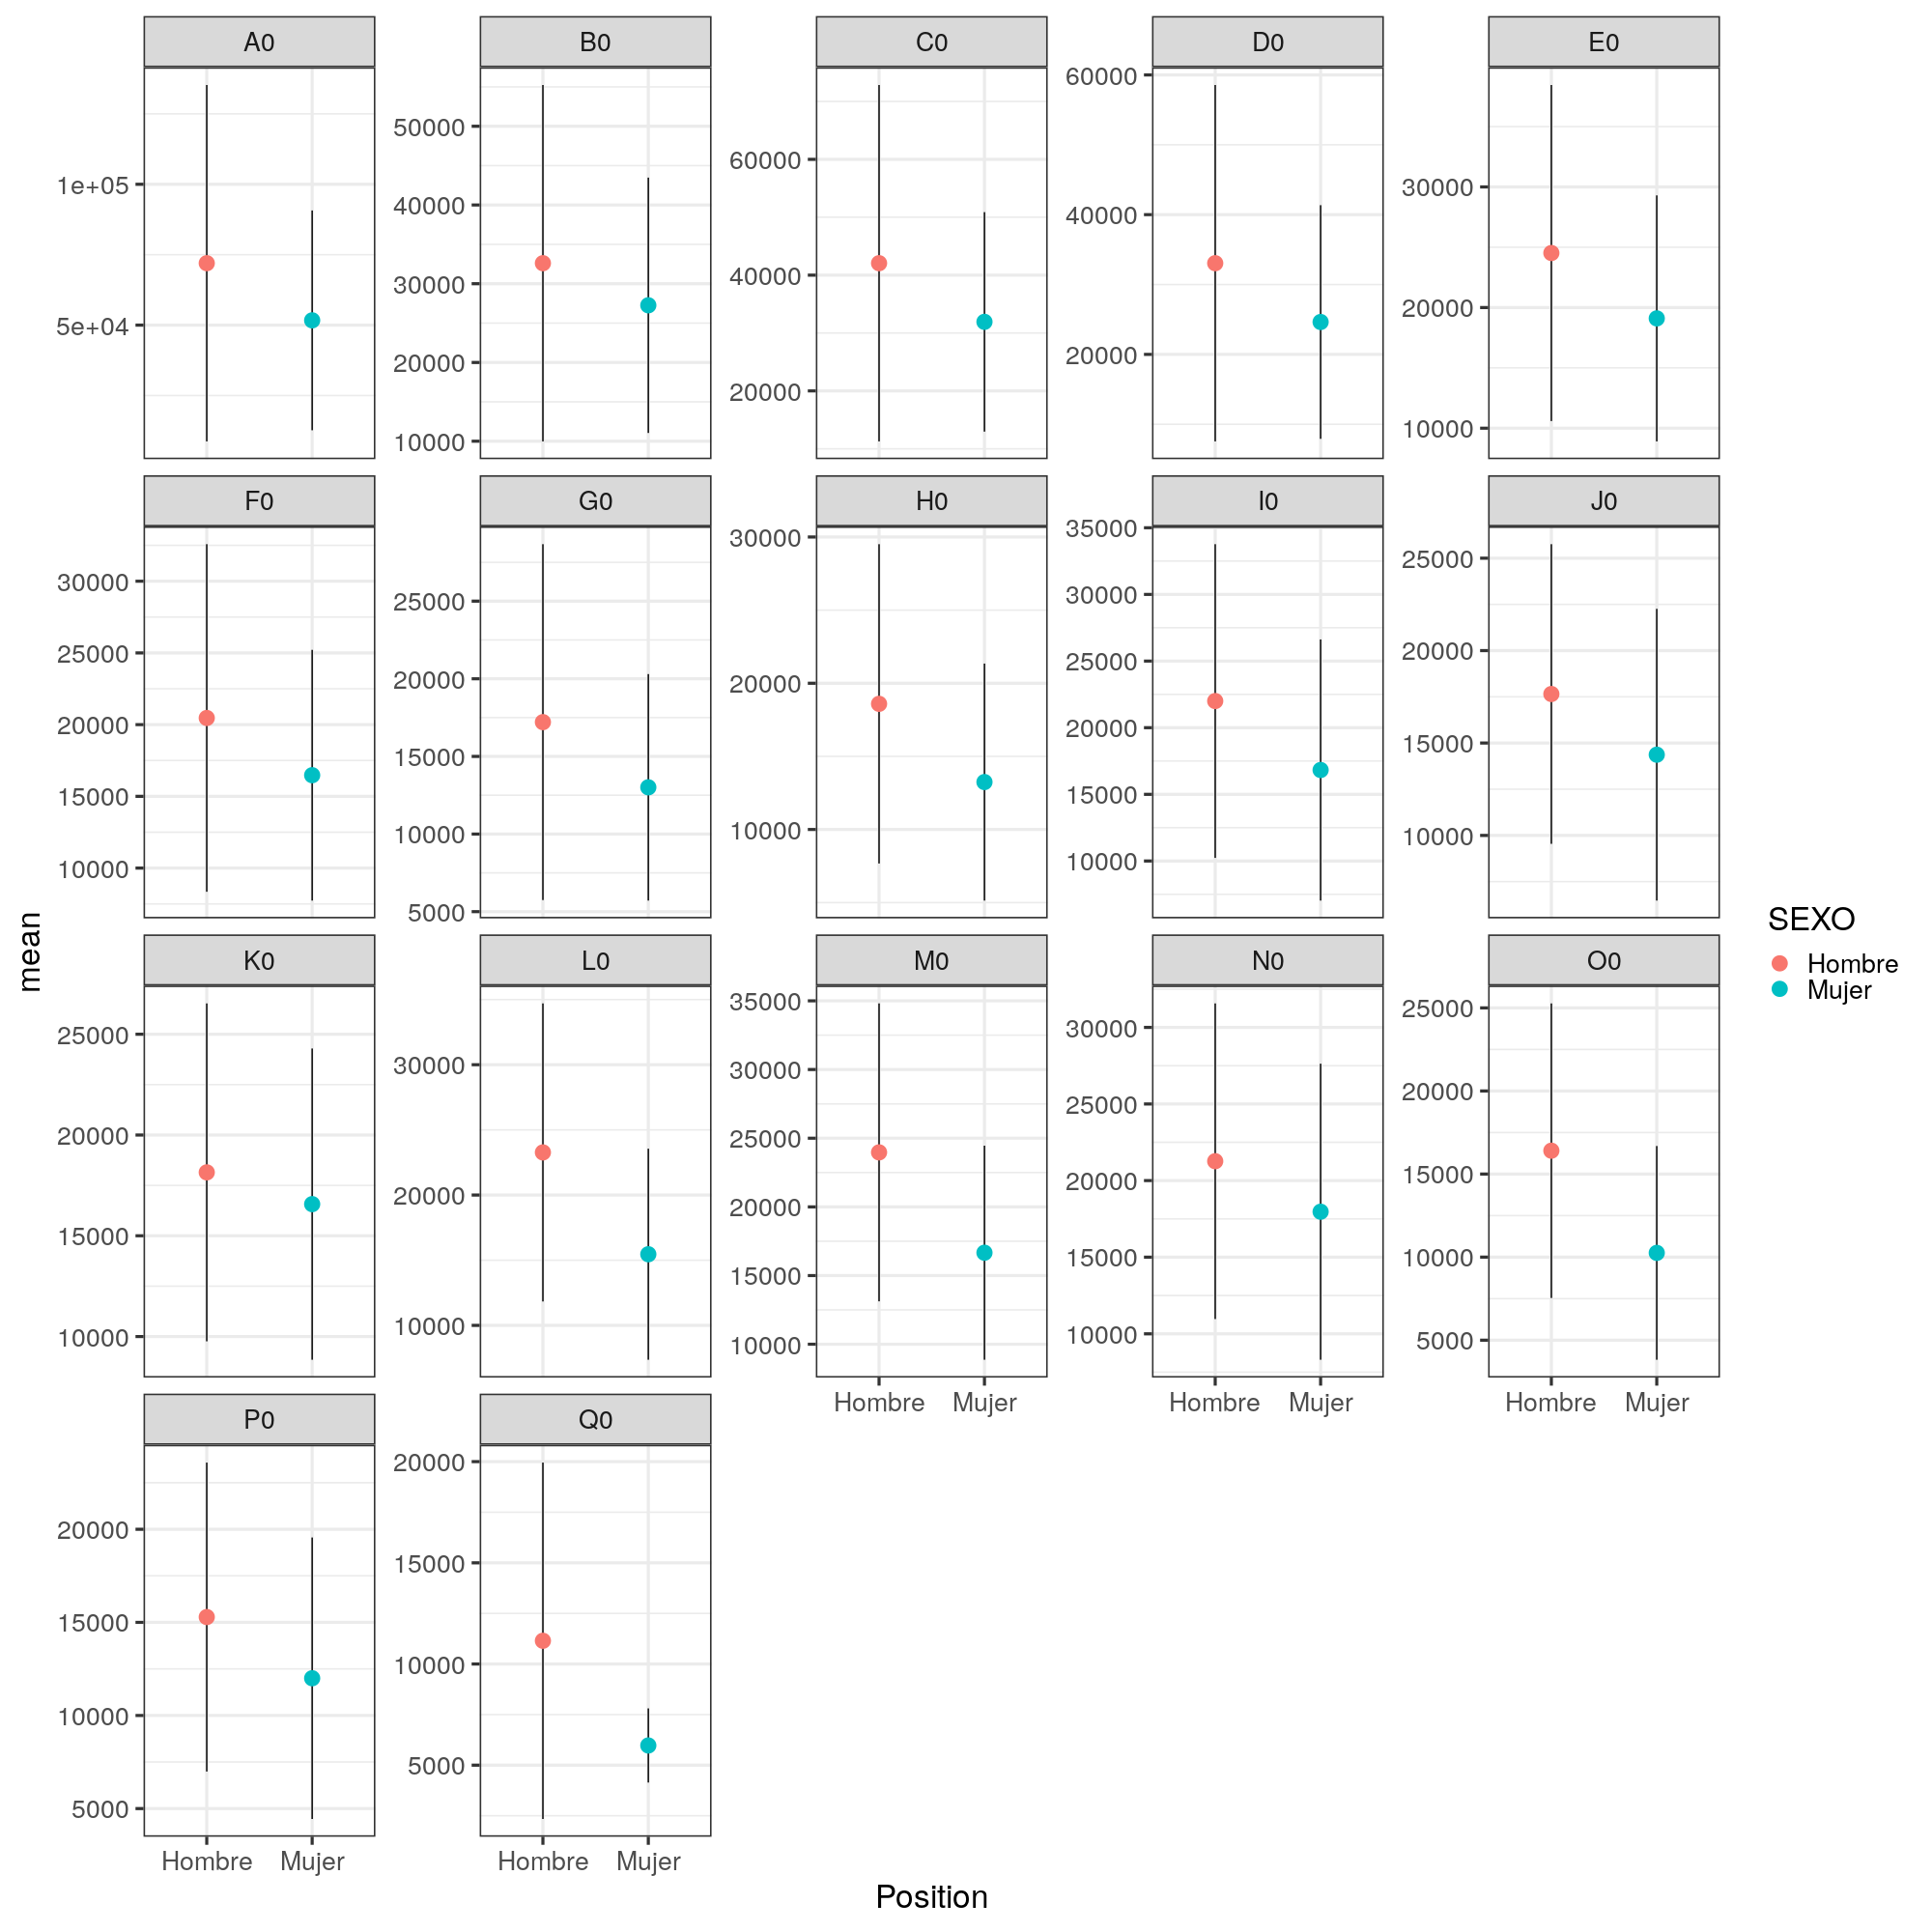

In [9]:
means <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), mean)
sds <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), sd)

sex_positions <- data.frame(SEXO=means$`Group.1`, Position=means$`Group.2`,   mean=means$x, sd=sds$x)


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


# Let's compare wages between sexes depending on position
#ggplot(sex_positions, aes(x=Position, y=mean)) + geom_point(aes(color=SEXO), size=5)
#ggplot(sex_positions, aes(x=Position, y=mean)) + geom_point(aes(x=SEXO, color=SEXO), size=5) + facet_wrap(Position~.)
ggplot(sex_positions, aes(x=Position, y=mean)) + 
    geom_errorbar(aes(x=SEXO, ymin=mean-sd, ymax=mean+sd), width=0) + 
    geom_point(aes(x=SEXO, color=SEXO), size=5) +     
    facet_wrap(Position~., scales = "free_y")

## grid.arrange and cheating with data

In previous classes we saw that you can use the par() function to arrange several different plot on the same page. With ggplot you need to use gridArrange, from the gridExtra package.

,SEXO,ESTU,mean,sd
,<chr>,<int>,<dbl>,<dbl>
1,Hombre,1,9.552035,0.7206533
2,Mujer,1,9.019467,0.8484114
3,Hombre,2,9.678520,0.6815540
4,Mujer,2,9.152834,0.8317309
5,Hombre,3,9.767660,0.6636415
6,Mujer,3,9.335045,0.7945205


,SEXO,ESTU,mean,sd
,<chr>,<int>,<dbl>,<dbl>
1,Hombre,1,17099.37,9449.349
2,Mujer,1,10797.76,6853.122
3,Hombre,2,19203.29,13452.828
4,Mujer,2,12233.22,7878.033
5,Hombre,3,20846.43,13359.753
6,Mujer,3,14470.33,10142.153


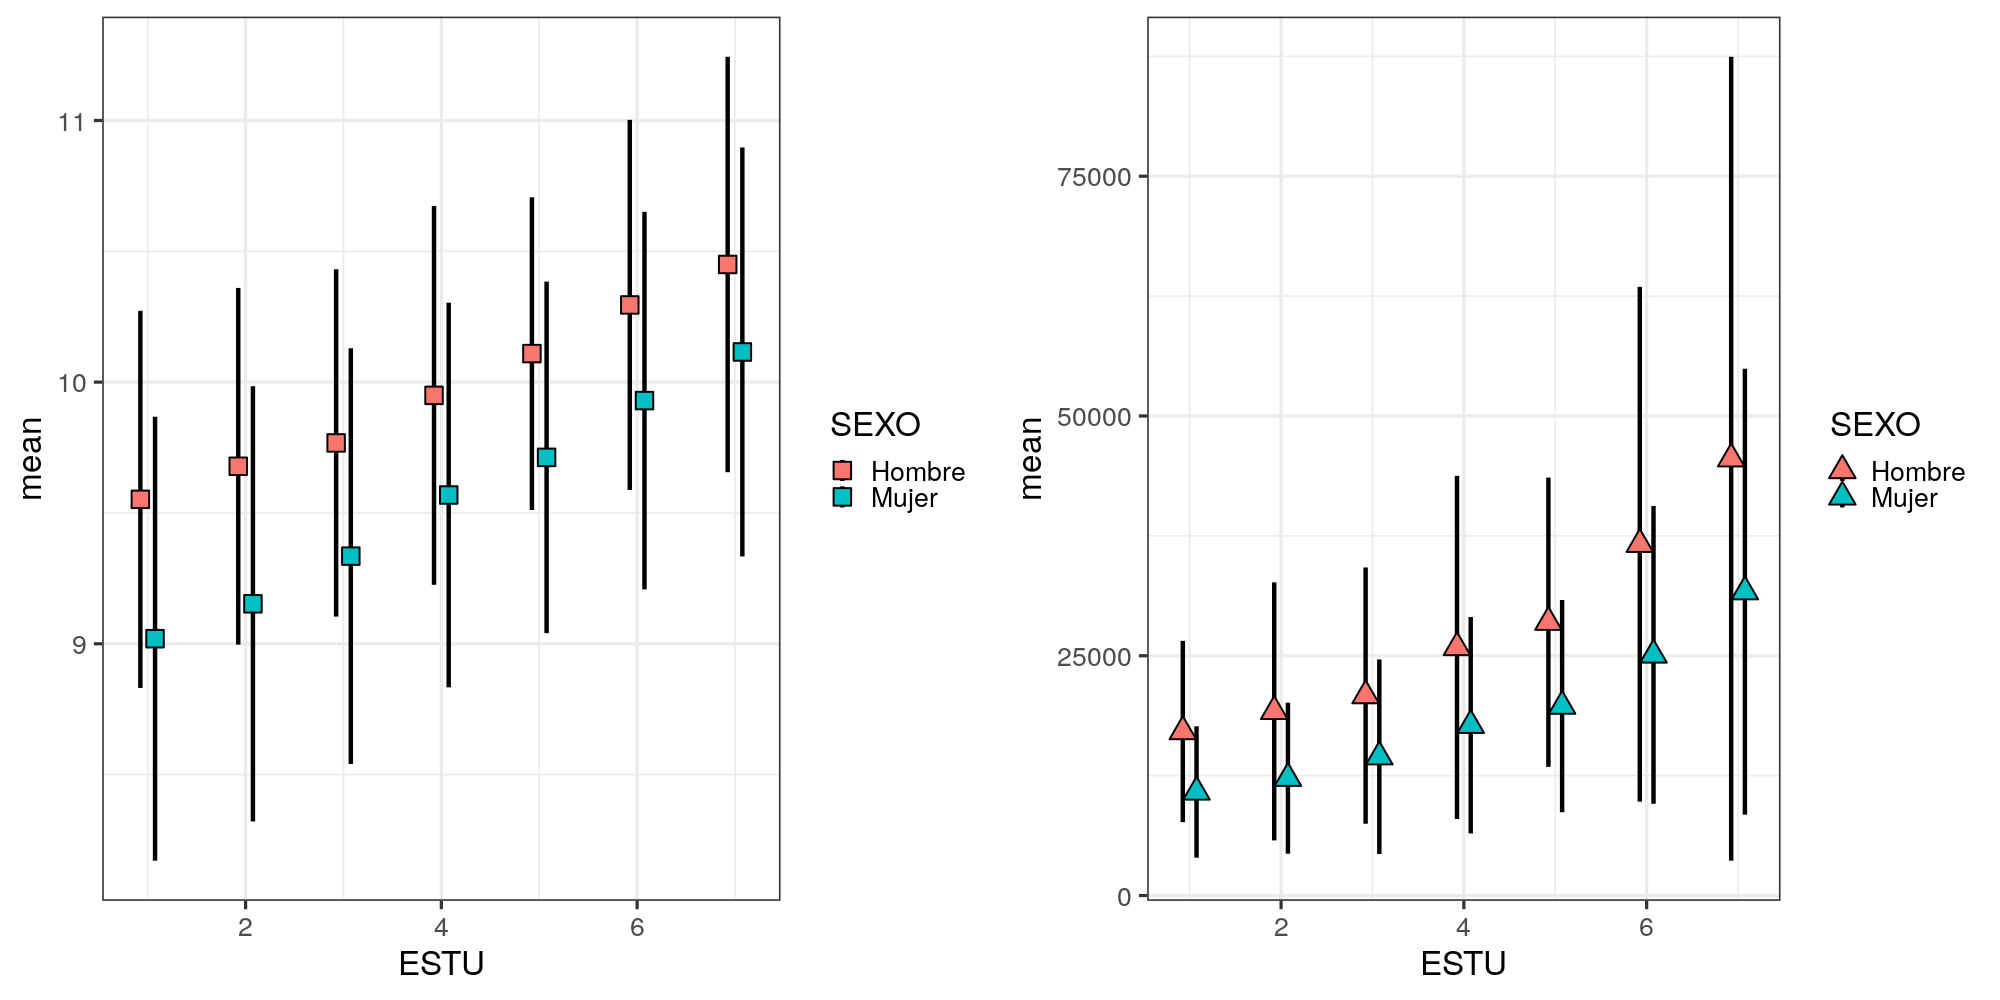

In [10]:
library(ggplot2)
library(gridExtra)

# default plots size
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)

# default theme and font size
theme_set(theme_bw(base_size = 24))


# Let's compare wages between sexes depending on studies (with the LOG salary)
mean <- aggregate(log(salary$SALBRUTO), by=list(salary$SEXO, salary$ESTU), mean)
sd <- aggregate(log(salary$SALBRUTO), by=list(salary$SEXO, salary$ESTU), sd)
sex_estu_log <- data.frame(SEXO=mean$`Group.1`, ESTU=mean$`Group.2`,   mean=mean$x, sd=sd$x)
head(sex_estu_log)

# Let's compare wages between sexes depending on studies (with the NATURAL salary)
mean <- aggregate(salary$SALBRUTO, by=list(salary$SEXO, salary$ESTU), mean)
sd <- aggregate(salary$SALBRUTO, by=list(salary$SEXO, salary$ESTU), sd)
sex_estu_nat <- data.frame(SEXO=mean$`Group.1`, ESTU=mean$`Group.2`,   mean=mean$x, sd=sd$x)
head(sex_estu_nat)


# geom_pointragne allows you to put dots and bars at the same time (for more shapes: http://www.sthda.com/english/wiki/ggplot2-point-shapes)
p1 <- ggplot(sex_estu_log) + geom_pointrange(aes(x=ESTU, y=mean, ymin=mean-sd, ymax=mean+sd, fill=SEXO), size=1.5, shape=22, color="black", position = position_dodge(width=0.3))
p2 <- ggplot(sex_estu_nat) + geom_pointrange(aes(x=ESTU, y=mean, ymin=mean-sd, ymax=mean+sd, fill=SEXO), size=1.5, shape=24, color="black", position = position_dodge(width=0.3))

# plot the two graph on the same page next to each other
grid.arrange(p1, p2, nrow=1)



It looks like we are getting two different results depending on whether the data has been log-transformed or not. In one case, studying decreases the gender pay gap and in the other it makes it worse! What do you think is happening? Which of the two plots is more correct? Are they both wrong? *hint: try to plot the histogram each data distributions (as in the first figures) against its own mean (as a vertical line), what do you observe?*

Warning message:
“Removed 1866 rows containing non-finite values (stat_density).”


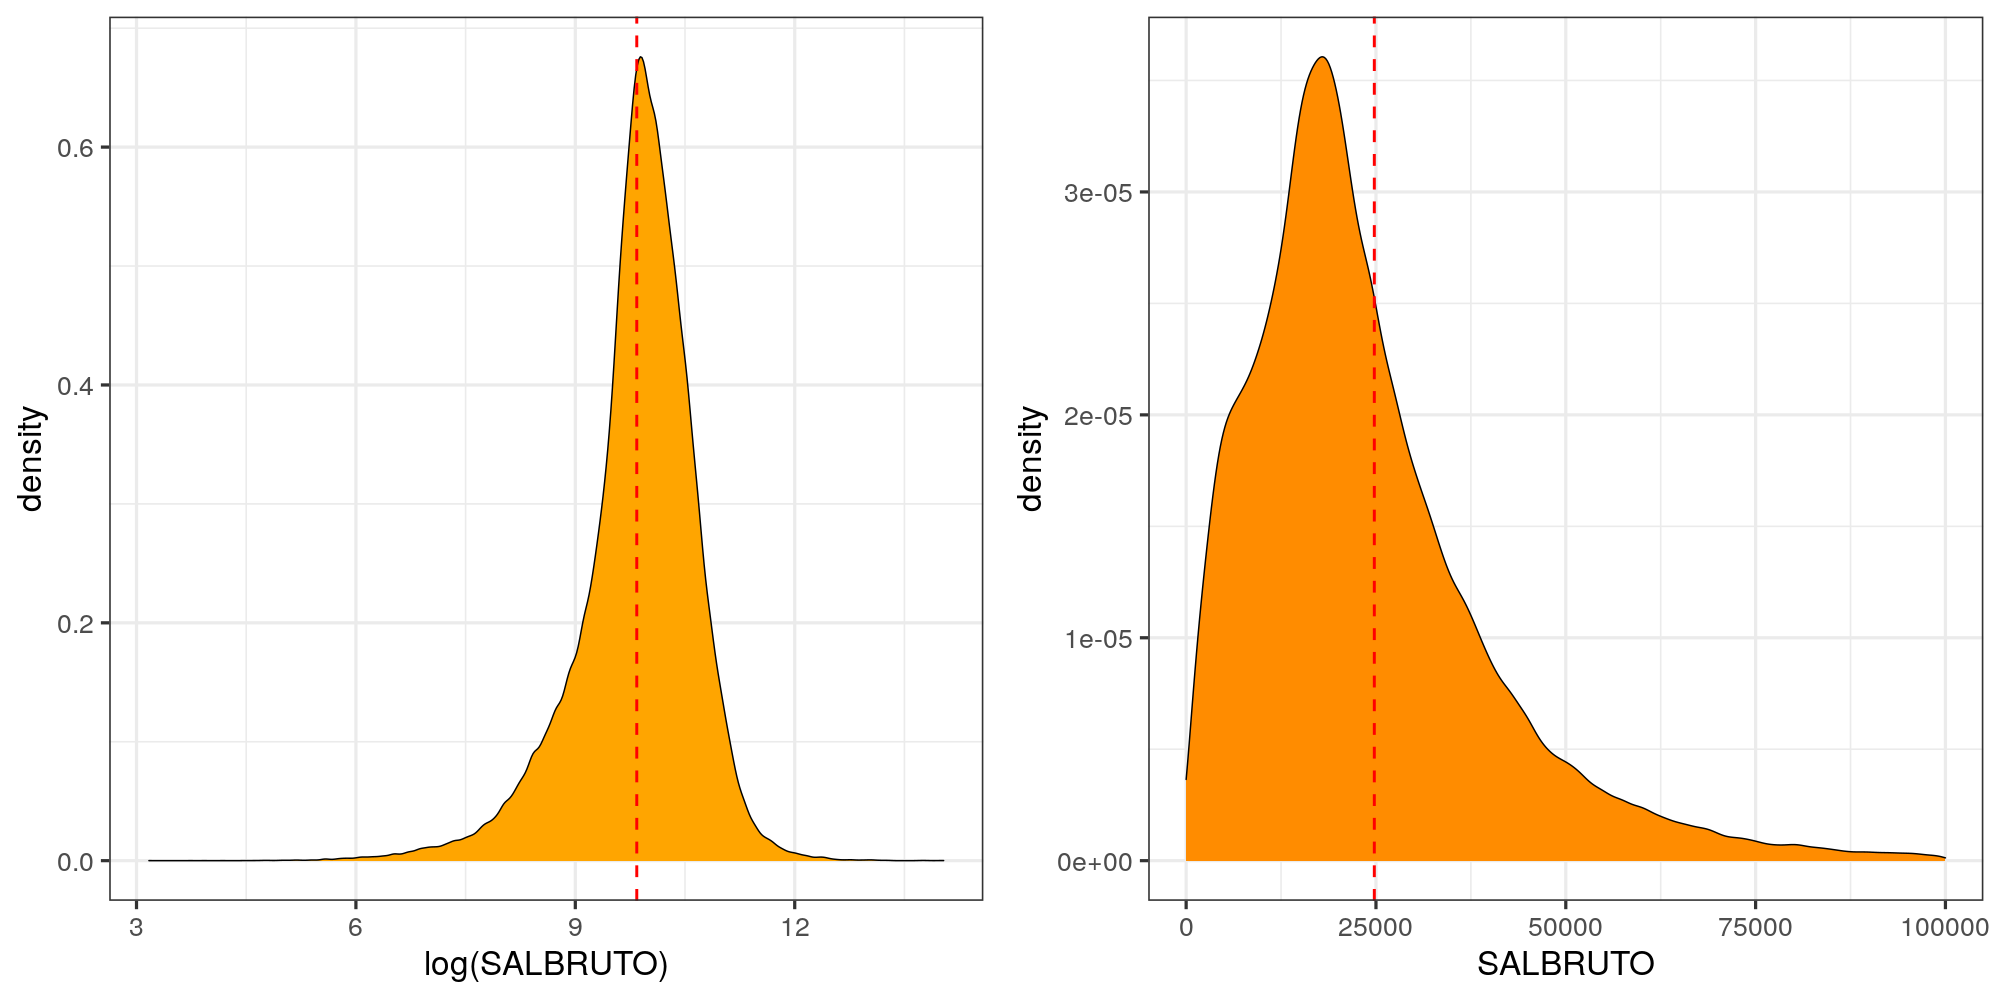

In [11]:

p3 <- ggplot(salary, aes(x=log(SALBRUTO))) + geom_density(fill="orange") +
    geom_vline(xintercept = mean(log(salary$SALBRUTO)), color="red", linetype="dashed", size=1)

p4 <- ggplot(salary, aes (x=SALBRUTO)) + geom_density(fill="darkorange") +
    geom_vline(xintercept = mean((salary$SALBRUTO)), color="red", linetype="dashed", size=1) +
    xlim(c(0, 100000))

grid.arrange(p3, p4, nrow=1)


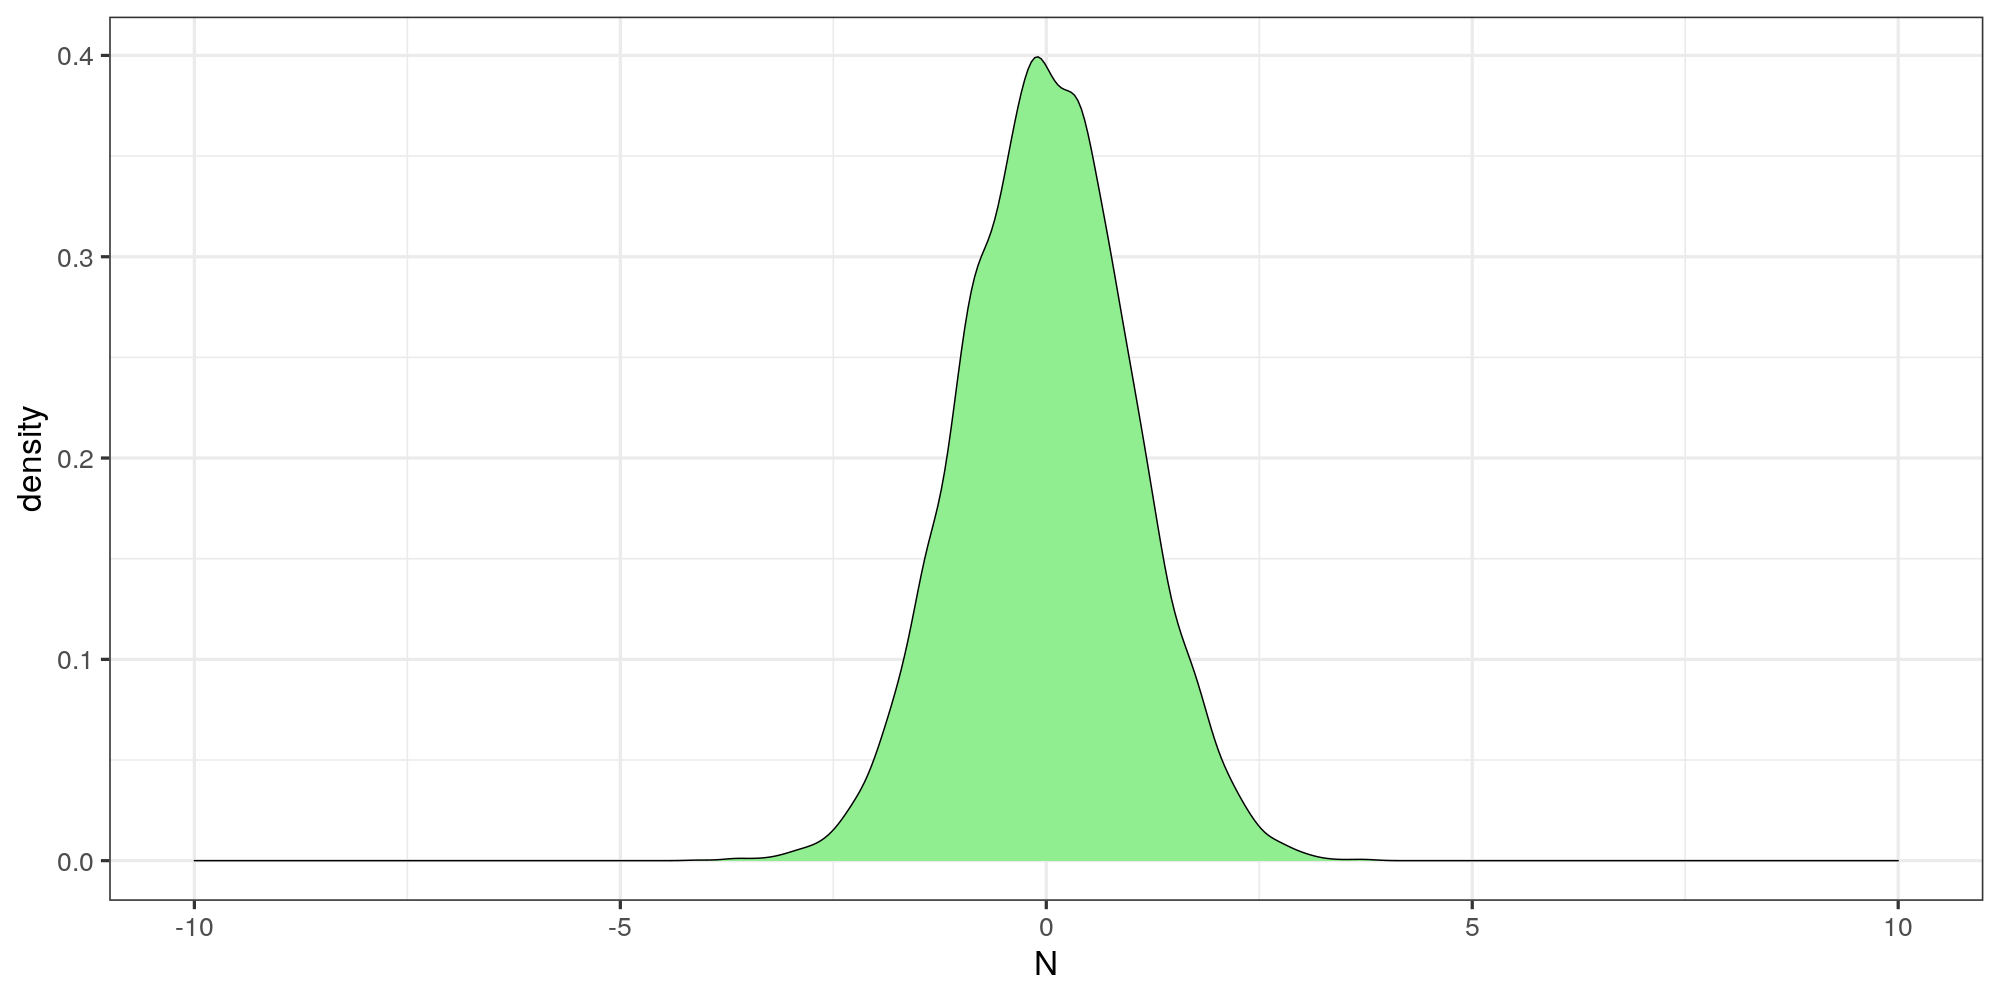

In [12]:
df <- data.frame(N = rnorm(10000, 0, 1))

ggplot(df, aes(x=N)) + geom_density(fill="lightgreen") + xlim(c(-10, 10))

Warning message:
“Removed 1866 rows containing non-finite values (stat_density).”
Warning message:
“Removed 140 rows containing non-finite values (stat_density).”


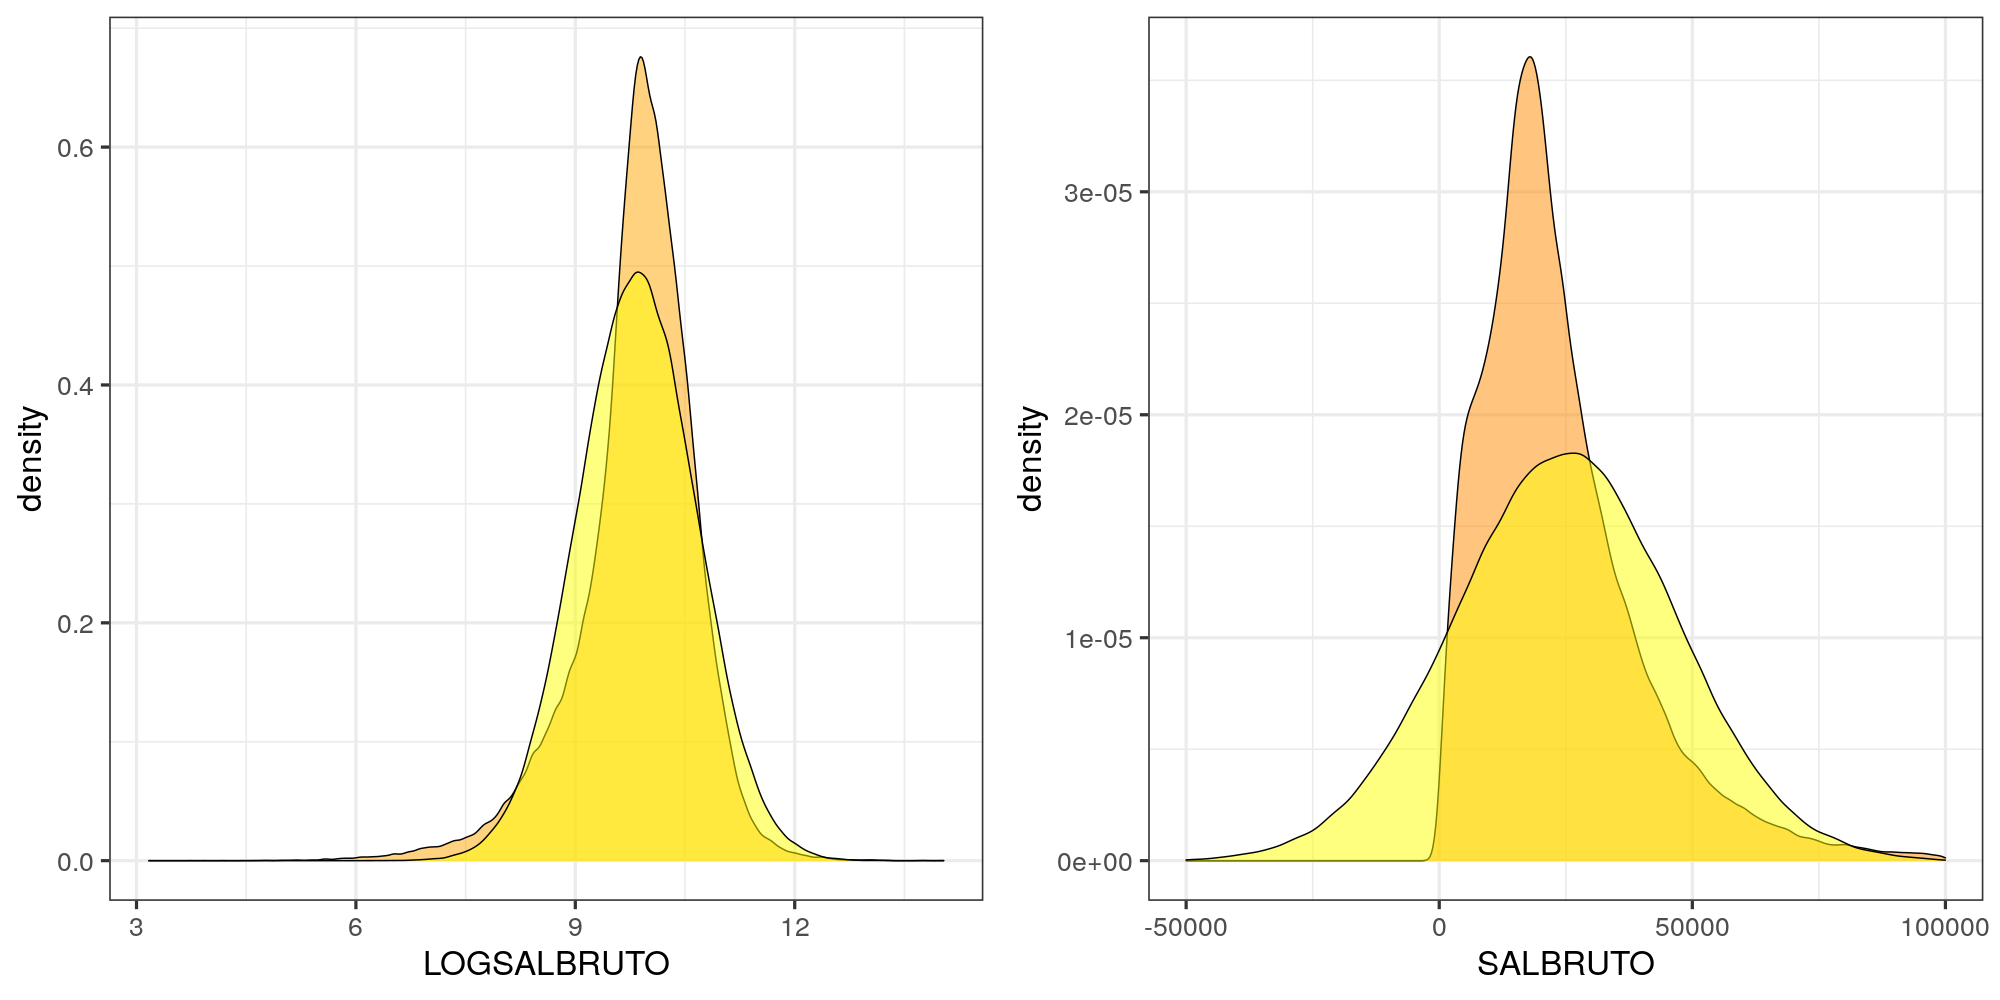

In [13]:
# create a normal ditribution with mean and sd equal to the log(SALBRUTO)
mean_log_salbruto <- mean(log(salary$SALBRUTO))
sd_log_salbruto <- sd(log(salary$SALBRUTO))
norm_log_salbruto <- rnorm(length(salary$SALBRUTO), mean_log_salbruto, sd_log_salbruto) 

# create a normal ditribution with mean and sd equal to the natural SALBRUTO
mean_nat_salbruto <- mean(salary$SALBRUTO)
sd_nat_salbruto <- sd(salary$SALBRUTO)
norm_nat_salbruto <- rnorm(length(salary$SALBRUTO), mean_nat_salbruto, sd_nat_salbruto) 

# create two dataframes to plot the SALBRUTOs againt their related normal distribution
df_log <- data.frame(LOGSALBRUTO = log(salary$SALBRUTO), NORM = norm_log_salbruto)
df_nat <- data.frame(SALBRUTO = salary$SALBRUTO, NORM = norm_nat_salbruto)

p1 <- ggplot(df_log) + 
        geom_density(aes(LOGSALBRUTO), fill="orange", alpha=0.5) + 
        geom_density(aes(NORM), fill="yellow", alpha=0.5) 

p2 <- ggplot(df_nat) + 
        geom_density(aes(SALBRUTO), fill="darkorange", alpha=0.5) + 
        geom_density(aes(NORM), fill="yellow", alpha=0.5) + xlim(c(-50000, 100000))

grid.arrange(p1, p2, nrow=1)

